Welcome to Tahir's,Hanan's Line Encoder
Choose the following
 1:Intialize Random Input
 2:Enter Custom Input
1
Enter Length of Random input
3
Choose Ratio Of 0:1
 1-50:50
 2-75:25
 3-85:15
1
 Random Input Data
[0, 0, 1]
The length of the longest palindromic subsequence is 2
The longest palindromic subsequence is 00
Choose the following
	1:Polar NRZ-L
	2:Polar NRZ-I
	3:Manchester
	4:Polar RZ
	5:AMI
	6:Scrambling AMI B8ZS(Bipolar with 8 zero substitution)
	7:Differncial Manchester
	8:Scrambling AMI HBD3(High Density Bipolar 3 Zeros)

Any other key to exit
	 2
Input Data
[0, 0, 1]


<ipython-input-2-0dd971a134e7>:244: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


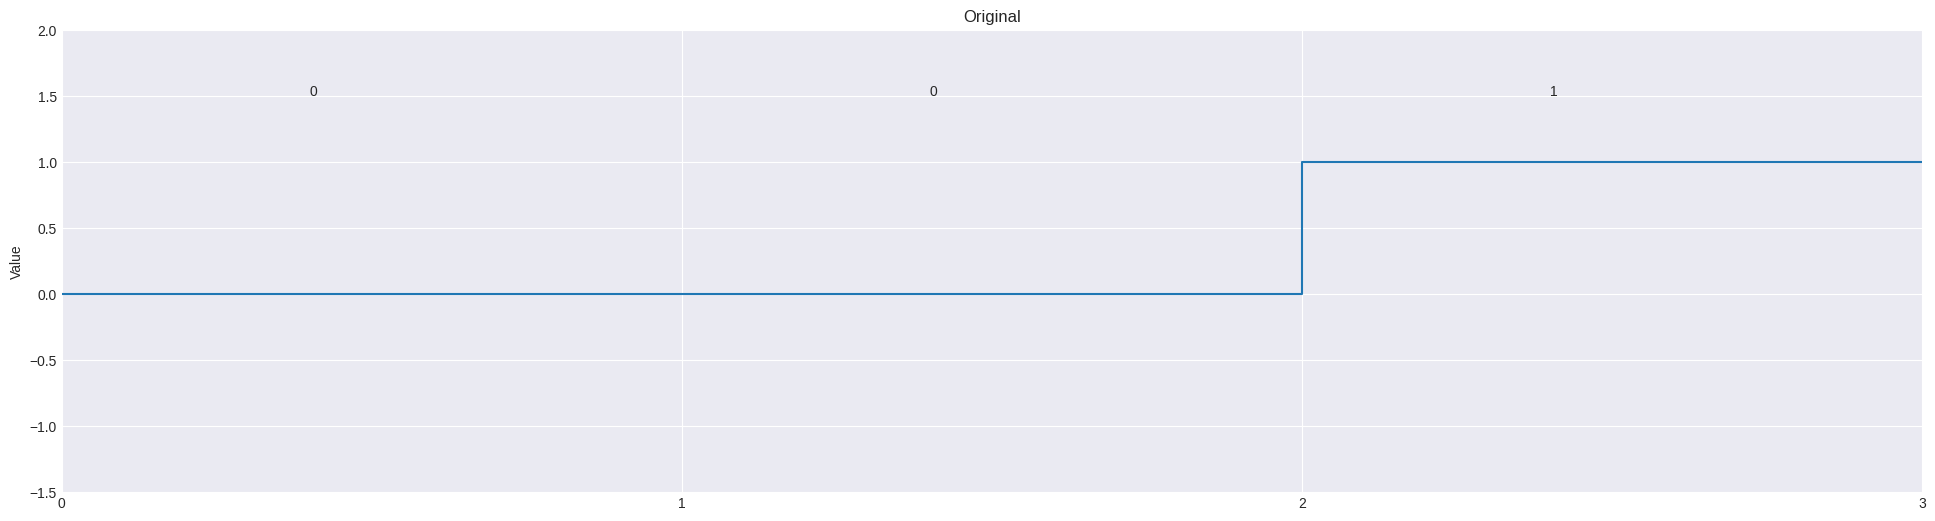

<ipython-input-2-0dd971a134e7>:259: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


Polar NRZ-I Data
[-1, -1, 1]


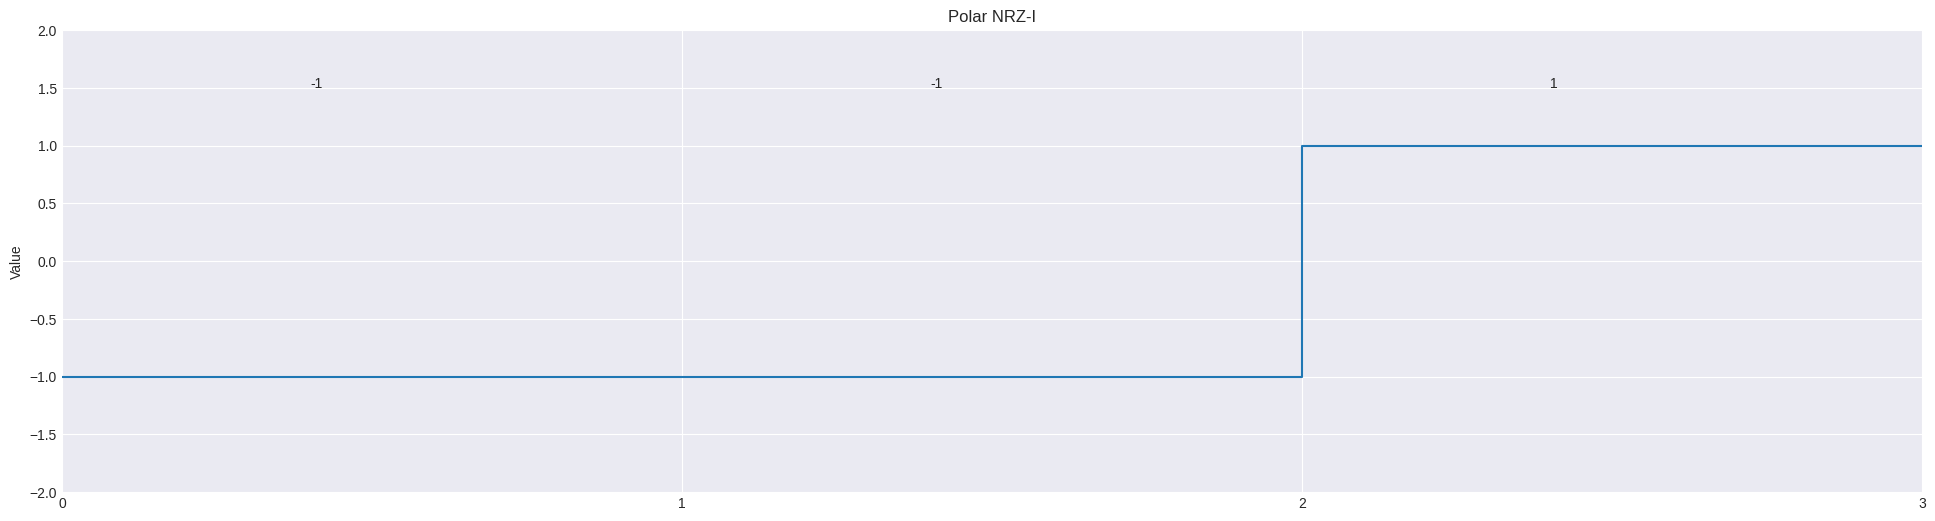

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
def randSeq(l,prob):
    random.seed(0)
    val=[]
    if(prob==1):
        lst=[1,0]
        for i in range(0,l):
            val.append(random.choice(lst))
    elif(prob==2):
        lst=[1,0,0,0]
        for i in range(0,l):
            val.append(random.choice(lst))
    elif(prob==3):
        lst=[1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0]
        for i in range(0,l):
            val.append(random.choice(lst))
    return val


def polar_nrz_l(inp):
    inp1=list(inp)
    inp1=[-1 if i==0 else 1 for i in inp1]
    return inp1


def polar_nrz_i(inp):
    inp2=list(inp)
    flag=False
    for i in range(len(inp2)):
        if inp2[i]==1 and not flag:
            flag=True
            continue
        if flag and inp2[i]==1:
            if inp2[i-1]==0:
                inp2[i]=1
                continue
            else :
                inp2[i]=0
                continue
        if flag:
            inp2[i]=inp2[i-1]
    inp2=[-1 if i==0 else 1 for i in inp2]
    return inp2


def manches(inp):
    inp1=list(inp)
    manches = []
    for i in inp1:
        if i==1:
            manches.append(-1)
            manches.append(1)
        else:
            manches.append(1)
            manches.append(-1)
    return manches


def polar_rz(inp):
    inp1=list(inp)
    inp1=[-1 if i==0 else 1 for i in inp1]
    li=[]
    for i in range(len(inp1)):
        li.append(inp1[i])
        li.append(0)
    return li


def AMI(inp):
    inp1=list(inp)
    flag=False
    for i in range(len(inp1)):
        if inp1[i]==1 and not flag:
            flag=True
            continue
        elif flag and inp1[i]==1:
            inp1[i]=-1
            flag=False
    return inp1


def B8ZS(inpt):
    inp=inpt[0:]
    r=[]
    prev=1
    count=0
    for i in range(len(inp)):
        if inp[i]==0:
            count=1
            for j in range(1,8):
                if i+j<len(inp):
                    if inp[i+j]==0:
                        count+=1
                    else:
                        break
                else:
                    break
            if count==8:
                for j in range(1,8):
                    inp[i+j]=-1
                r.append(0)
                r.append(0)
                r.append(0)
                r.append(prev)
                prev = prev * -1
                r.append(prev)
                r.append(0)
                r.append(prev)
                prev = prev * -1
                r.append(prev)
                count = 0
            else:
                r.append(inp[i])
        elif inp[i]==1:
            prev = inp[i];
            r.append(inp[i])
        else:
            continue
    return r

def count_nonzero_pulses(l):
    count = 0
    for i in range(len(l)):
        if l[i] == 1 or l[i] == -1:
            count = count + 1
    return count


def Diff_manchester(inp):
    li=[]
    if inp[0]==1:
        li.append(-1)
        li.append(1)
    else:
        li.append(1)
        li.append(-1)
    for i in range(1,len(inp[1:])):
        if li[-1]==1:
            if(inp[i]==1):
                li.append(-1)
                li.append(1)
            else:
                li.append(1)
                li.append(-1)
        else:
            if(inp[i]==1):
                li.append(1)
                li.append(-1)
            else:
                li.append(-1)
                li.append(1)
    return li

def hdb3(inpt):
    inp=inpt[0:]
    r=[]
    prev=1
    count=0
    parity=0
    for i in range(len(inp)):
        if inp[i]==0:
            count=1
            for j in range(1,4):
                if i+j<len(inp):
                    if inp[i+j]==0:
                        count+=1
                    else:
                        break
                else:
                    break
            if count==4:
                for j in range(1,4):
                    inp[i+j]=-1
                if parity%2==1:
                    r.append(0)
                    r.append(0)
                    r.append(0)
                    r.append(prev)
                    parity+=1
                else:
                    prev = prev * -1
                    r.append(prev)
                    r.append(0)
                    r.append(0)
                    r.append(prev)
                count = 0
            else:
                r.append(inp[i])
        elif inp[i]==1:
            parity+=1
            prev = inp[i];
            r.append(inp[i])
        else:
            continue
    return r


def findLongestPalindrome(X, Y, m, n, lookup):
    if m == 0 or n == 0:
        return ""
    if X[m - 1] == Y[n - 1]:
        return findLongestPalindrome(X, Y, m - 1, n - 1, lookup) + X[m - 1]
    if lookup[m - 1][n] > lookup[m][n - 1]:
        return findLongestPalindrome(X, Y, m - 1, n, lookup)
    return findLongestPalindrome(X, Y, m, n - 1, lookup)


def LCSLength(X, Y, n, lookup):
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            if X[i - 1] == Y[j - 1]:
                lookup[i][j] = lookup[i - 1][j - 1] + 1
            else:
                lookup[i][j] = max(lookup[i - 1][j], lookup[i][j - 1])
    return lookup[n][n]


def lps(inp):
    inp = list(map(str, inp))
    inpt=""
    for x in inp:
        inpt+=x
    reverse=inpt[::-1]
    lookup = [[0 for x in range(len(inpt) + 1)] for y in range(len(inpt) + 1)]
    print('The length of the longest palindromic subsequence is',
        LCSLength(inpt, reverse, len(inpt), lookup))
    print('The longest palindromic subsequence is',
        findLongestPalindrome(inpt, reverse, len(inpt), len(reverse), lookup))


def draw(result,bit,data):
    if bit==2:
        if data=="Original":
            x = np.arange(0,len(result)+1)
            plt.xlim(0, len(result))
            plt.ylim(-1.5, 2)
            plt.ylabel('Value')
            plt.title(data)
            array = result
            for i in range(len(result)):
                plt.text(i+0.4, 1.5, array[i])
            plt.style.use('seaborn-dark')
            plt.grid(1)
            plt.xticks(x)
            plt.step(x, [array[0]]+array)
            plt.gcf().set_size_inches(24, 6)
            plt.show()
        else:
            x = np.arange(0,len(result)+1)
            plt.xlim(0, len(result))
            plt.ylim(-2, 2)
            plt.ylabel('Value')
            plt.title(data)
            array = result
            for i in range(len(result)):
                plt.text(i+0.4, 1.5, array[i])
            plt.style.use('seaborn-dark')
            plt.grid(1)
            plt.xticks(x)
            plt.step(x, [array[0]]+array)
            plt.gcf().set_size_inches(24, 6)
            plt.show()
    elif bit==3:
        x = np.arange(0,len(result)+1)
        plt.xlim(0, len(result))
        plt.ylim(-2, 2)
        plt.ylabel('Value')
        plt.title(data)
        array = result
        for i in range(len(result)):
            plt.text(i+0.4, 1.5, array[i])
        plt.style.use('seaborn-dark')
        plt.grid(1)
        plt.xticks(x)
        plt.step(x, [array[0]]+array)
        plt.gcf().set_size_inches(24, 6)
        plt.show()


if __name__ == '__main__':
    print("Welcome to Tahir's,Hanan's Line Encoder")
    print("Choose the following\n 1:Intialize Random Input\n 2:Enter Custom Input")
    ch=int(input())
    if ch==1:
        l=int(input("Enter Length of Random input\n"))
        prob=int(input("Choose Ratio Of 0:1\n 1-50:50\n 2-75:25\n 3-85:15\n"))
        inputdata=randSeq(l,prob)
        print(" Random Input Data")
        print(inputdata)
    elif ch==2:
        data=input("Enter your Custom Input In NRZ Format\n")
        inputdata=[]
        for x in data:
            inputdata.append(int(x))
        print("Input Data")
        print(inputdata)
    lps(inputdata)
    while True:
        ch=int(input("Choose the following\n\t1:Polar NRZ-L\n\t2:Polar NRZ-I\n\t3:Manchester\n\t4:Polar RZ\n\t5:AMI\n\t6:Scrambling AMI B8ZS(Bipolar with 8 zero substitution)\n\t7:Differncial Manchester\n\t8:Scrambling AMI HBD3(High Density Bipolar 3 Zeros)\n\nAny other key to exit\n\t "));
        if ch==1:
            result=polar_nrz_l(inputdata)
            print("Input Data")
            print(inputdata)
            draw(inputdata,2,"Original")
            print("Polar NRZ-L Data")
            print(result)
            draw(result,2,"Polar NRZ-L")
        elif ch==2:
            result=polar_nrz_i(inputdata)
            print("Input Data")
            print(inputdata)
            draw(inputdata,2,"Original")
            print("Polar NRZ-I Data")
            print(result)
            draw(result,2,"Polar NRZ-I")
        elif ch==3:
            result=manches(inputdata)
            print("Input Data")
            print(inputdata)
            draw(inputdata,2,"Original")
            print("Manchester")
            print(result)
            draw(result,3,"Manchester")
        elif ch==4:
            result=polar_rz(inputdata)
            print("Input Data")
            print(inputdata)
            draw(inputdata,2,"Original")
            print("Polar RZ")
            print(result)
            draw(result,2,"Polar RZ")
        elif ch==5:
            result=AMI(inputdata)
            print("Input Data")
            print(inputdata)
            draw(inputdata,2,"Original")
            print("AMI")
            print(result)
            draw(result,2,"AMI")
        elif ch==6:
            result=B8ZS(inputdata)
            print("Input Data")
            print(inputdata)
            draw(inputdata,2,"Original")
            print("B8ZS (Bipolar with 8 zero substitution)")
            print(result)
            draw(result,2,"B8ZS")
        elif ch==7:
            result=Diff_manchester(inputdata)
            print("Input Data")
            print(inputdata)
            draw(inputdata,2,"Original")
            print("Diff_Manches")
            print(result)
            draw(result,2,"B8ZS")
        elif ch==8:
            result=hdb3(inputdata)
            print("Input Data")
            print(inputdata)
            draw(inputdata,2,"Original")
            print("HBD3(High Density Bipolar 3 Zeros)")
            print(result)
            draw(result,2,"B8ZS")
        else:
            break
    print("Byeee, Have a nice day.....")
    print("\U0001F44B")
